## Introduction
Exploring episodes data for Game of Thrones 

Game of Thrones

Game of Thrones is a fantasy drama television series based on the "A Song of Ice and Fire" novels by George R. R. Martin. It premiered on HBO on April 17, 2011, and concluded on May 19, 2019, spanning eight seasons. The show is set in the fictional continents of Westeros and Essos and interweaves multiple plotlines involving noble families vying for control of the Iron Throne and the Seven Kingdoms of Westeros. With its intricate political intrigue, complex characters, and epic battles, Game of Thrones became a cultural phenomenon, garnering widespread critical acclaim and a dedicated fanbase.

The series received numerous awards and nominations, including 59 Primetime Emmy Awards, making it one of the most awarded series in Emmy history. It also achieved commercial success, with its viewership steadily growing throughout its run. The final season, however, received mixed reviews from both critics and fans.

Game of Thrones is known for its shocking plot twists, morally ambiguous characters, and high production values, including lavish costumes, stunning visual effects, and expansive filming locations. It has left a significant impact on popular culture and has inspired countless discussions, theories, and spin-off projects.









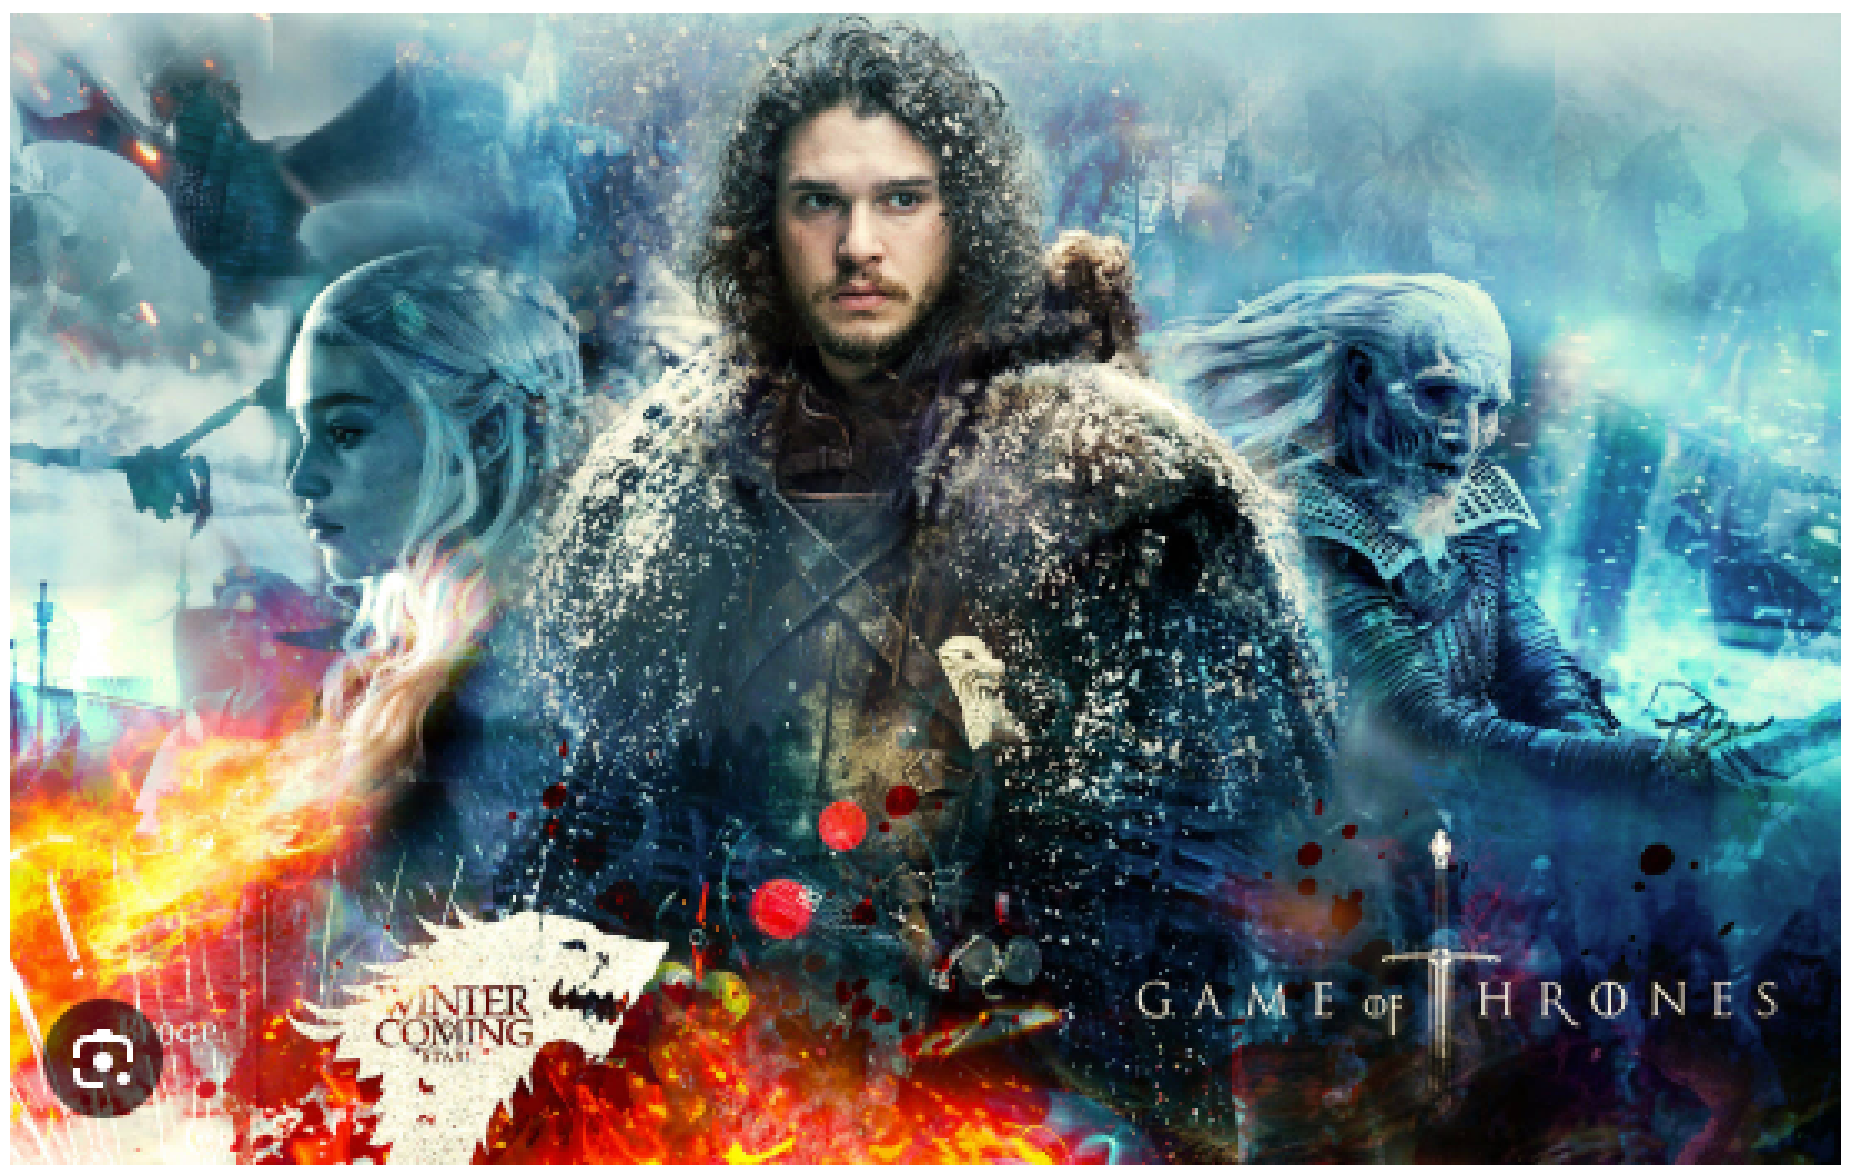

In [72]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your image file
image_path = "C:/Users/MAGA/Desktop/Game of Thrones/GOT.JPG"

# Load the image
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


## Exploratory Analysis
To begin this exploratory analysis, first import libraries and define functions for plotting the data using `matplotlib`. Depending on the data, not all plots will be made. 

In [73]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

There is 1 csv file in the current version of the dataset. 

In [74]:
print(os.listdir('C:/Users/MAGA/Desktop/Game of Thrones'))
df_ep = pd.read_csv('C:/Users/MAGA/Desktop/Game of Thrones/got_csv_full.csv')
df_ep.head(10)
print('Number of episodes in the dataset : ' , len(df_ep))
    


['.ipynb_checkpoints', 'Analysis Game of Thrones Episode Data.ipynb', 'GOT.JPG', 'got_csv_full.csv']
Number of episodes in the dataset :  73


Index(['Season', 'Episode_Number', 'Number_in_Season', 'Episode_Name',
       'Director', 'Writer', 'Original_Air_Date', 'US_viewers_million',
       'Runtime_mins', 'IMDB_Description', 'IMDB_votes', 'Imdb_Rating',
       'Notable_Death_Count'],
      dtype='object')
   Imdb_Rating  US_viewers_million
0          9.0                2.22
1          8.8                2.20
2          8.7                2.44
3          8.8                2.45
4          9.1                2.58
5          9.2                2.44
6          9.3                2.40
7          9.1                2.72
8          9.6                2.66
9          9.5                3.04
Number of episodes in the dataset: 73
       Imdb_Rating  US_viewers_million
count    73.000000           73.000000
mean      8.902740            6.447808
std       0.898142            2.827372
min       4.300000            2.200000
25%       8.700000            3.900000
50%       9.000000            6.640000
75%       9.400000            7.8200

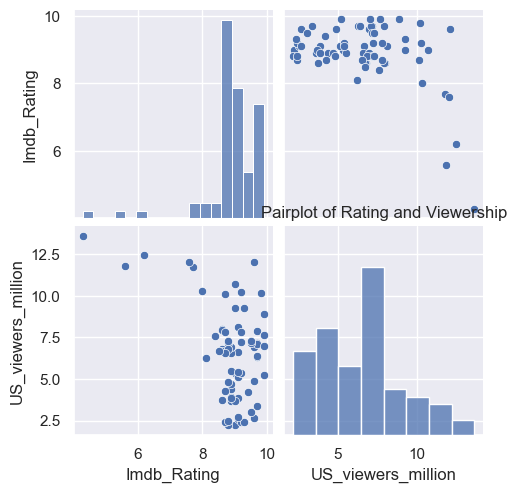

                    Imdb_Rating  US_viewers_million
Imdb_Rating            1.000000           -0.448423
US_viewers_million    -0.448423            1.000000


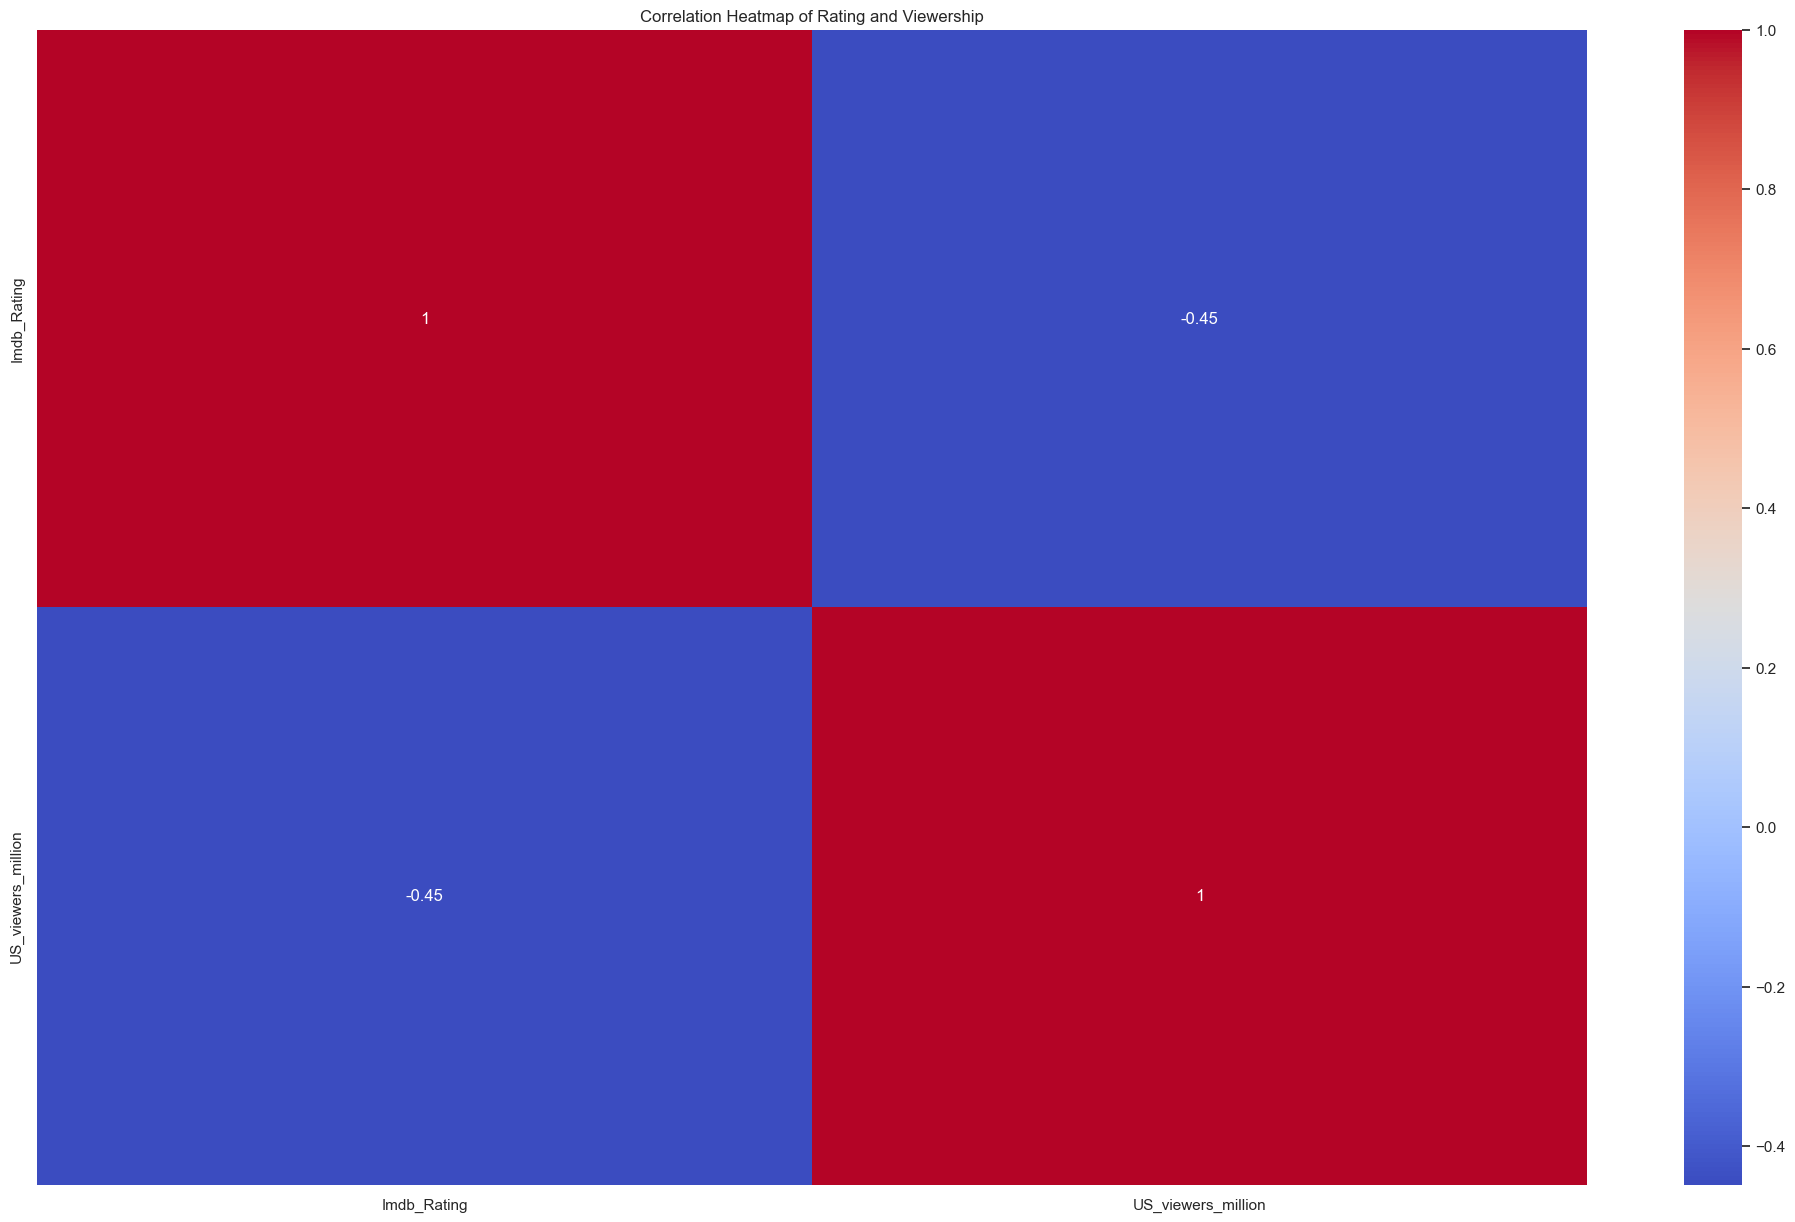

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df_ep = pd.read_csv('C:/Users/MAGA/Desktop/Game of Thrones/got_csv_full.csv')

# Print the column names to verify
print(df_ep.columns)

# Print the first 10 rows of the dataset
print(df_ep[['Imdb_Rating', 'US_viewers_million']].head(10))

# Print the number of episodes in the dataset
print('Number of episodes in the dataset:', len(df_ep))

# Summary statistics for Rating and Viewership
summary_stats = df_ep[['Imdb_Rating', 'US_viewers_million']].describe()
print(summary_stats)

# Pairplot for Rating and Viewership
sns.pairplot(df_ep[['Imdb_Rating', 'US_viewers_million']])
plt.title('Pairplot of Rating and Viewership')
plt.show()

# Correlation between Rating and Viewership
correlation = df_ep[['Imdb_Rating', 'US_viewers_million']].corr()
print(correlation)

# Heatmap of correlations
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Rating and Viewership')
plt.show()


In [75]:
df_ep_clean = pd.read_csv('C:/Users/MAGA/Desktop/Game of Thrones/got_csv_full.csv')
df_ep_clean.head(10)
print('Number of episodes in the dataset : ' , len(df_ep))

Number of episodes in the dataset :  73


In [76]:
#plotPerColumnDistribution(df_ep, 10, 5)
print(df_ep.dtypes)

Season                   int64
Episode_Number           int64
Number_in_Season         int64
Episode_Name            object
Director                object
Writer                  object
Original_Air_Date       object
US_viewers_million     float64
Runtime_mins             int64
IMDB_Description        object
IMDB_votes               int64
Imdb_Rating            float64
Notable_Death_Count      int64
dtype: object


In [77]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

import seaborn as sns 
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff

# Install cufflinks if not already installed
try:
    import cufflinks as cf
except ModuleNotFoundError:
    !pip install cufflinks
    import cufflinks as cf

import warnings
warnings.filterwarnings('ignore')


The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

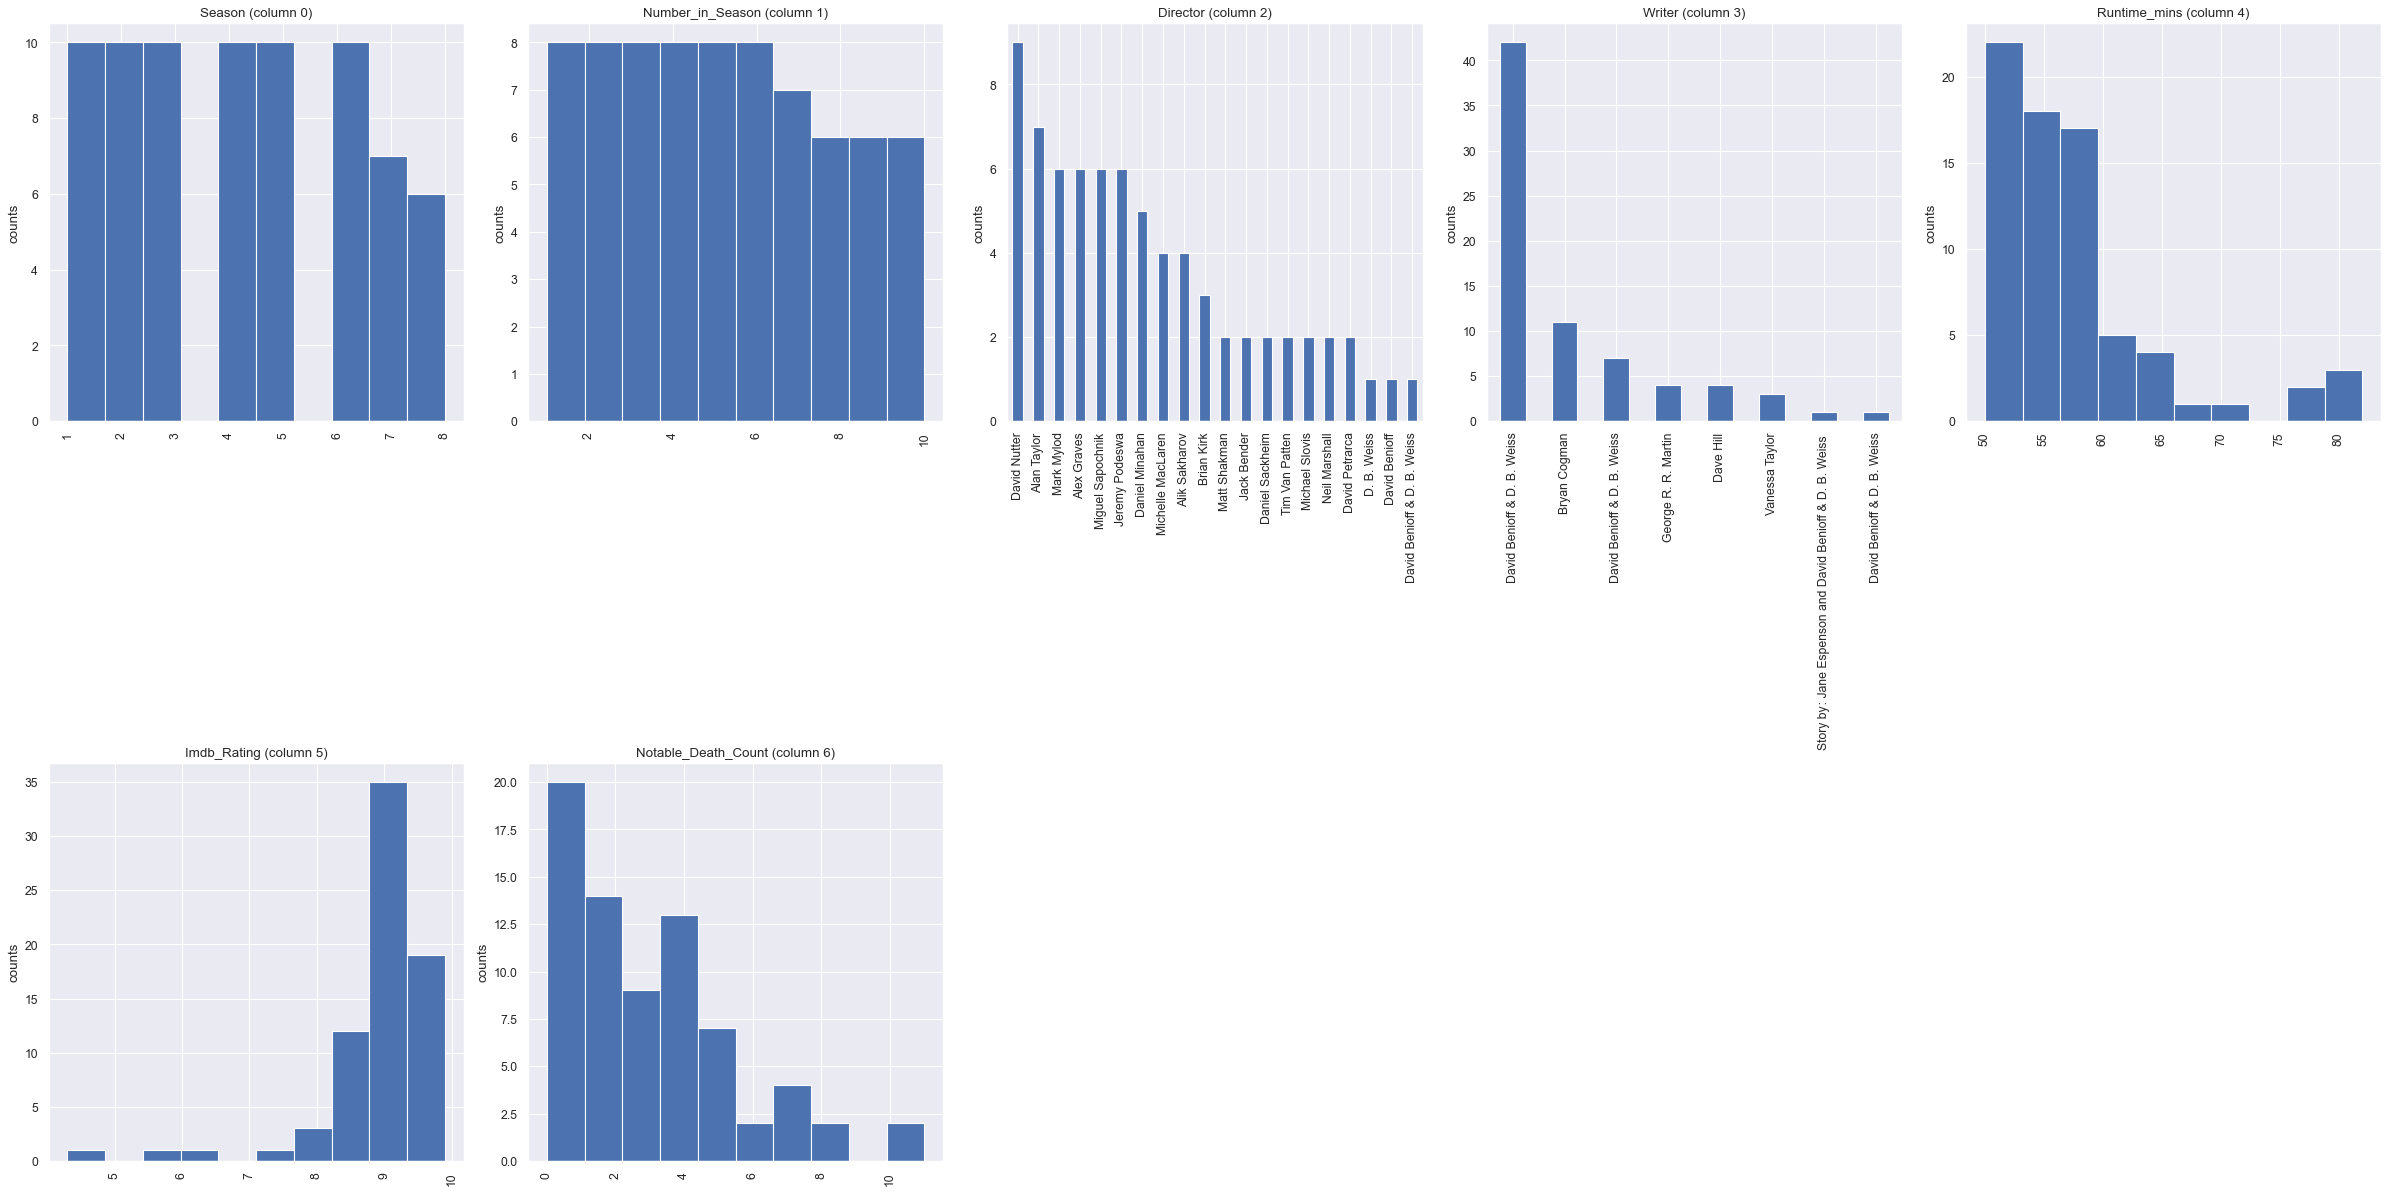

In [78]:
import math

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = math.ceil((nCol + nGraphPerRow - 1) / nGraphPerRow)  # Ensure nGraphRow is an integer
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

# Call the function
plotPerColumnDistribution(df_ep, 10, 5)



In [79]:
df_ep.head(5)

Season  Episode_Number  Number_in_Season  \
0       1               1                 1   
1       1               2                 2   
2       1               3                 3   
3       1               4                 4   
4       1               5                 5   

                            Episode_Name        Director  \
0                       Winter Is Coming  Tim Van Patten   
1                          The Kingsroad  Tim Van Patten   
2                              Lord Snow      Brian Kirk   
3  Cripples, Bastards, and Broken Things      Brian Kirk   
4                  The Wolf and the Lion      Brian Kirk   

                        Writer Original_Air_Date  US_viewers_million  \
0  David Benioff & D. B. Weiss    April 17, 2011                2.22   
1  David Benioff & D. B. Weiss    April 24, 2011                2.20   
2  David Benioff & D. B. Weiss       May 1, 2011                2.44   
3                 Bryan Cogman       May 8, 2011                2.45   
4  David Benioff & D. B. Weiss      May 15, 2011                2.58   

   Runtime_mins                                   IMDB_Description  \
0            62  Jon Arryn, the Hand of the King, is dead. King...   
1            56  While Bran recovers from his fall, Ned takes o...   
2            58  Lord Stark and his daughters arrive at King's ...   
3            56  Eddard investigates Jon Arryn's murder. Jon be...   
4            55  Catelyn has captured Tyrion and plans to bring...   

   IMDB_votes  Imdb_Rating  Notable_Death_Count  
0       27685          9.0                    4  
1       21256          8.8                    3  
2       20090          8.7                    0  
3       19123          8.8                    1  
4       20062          9.1                    5

Distribution graphs (histogram/bar graph) of sampled columns:

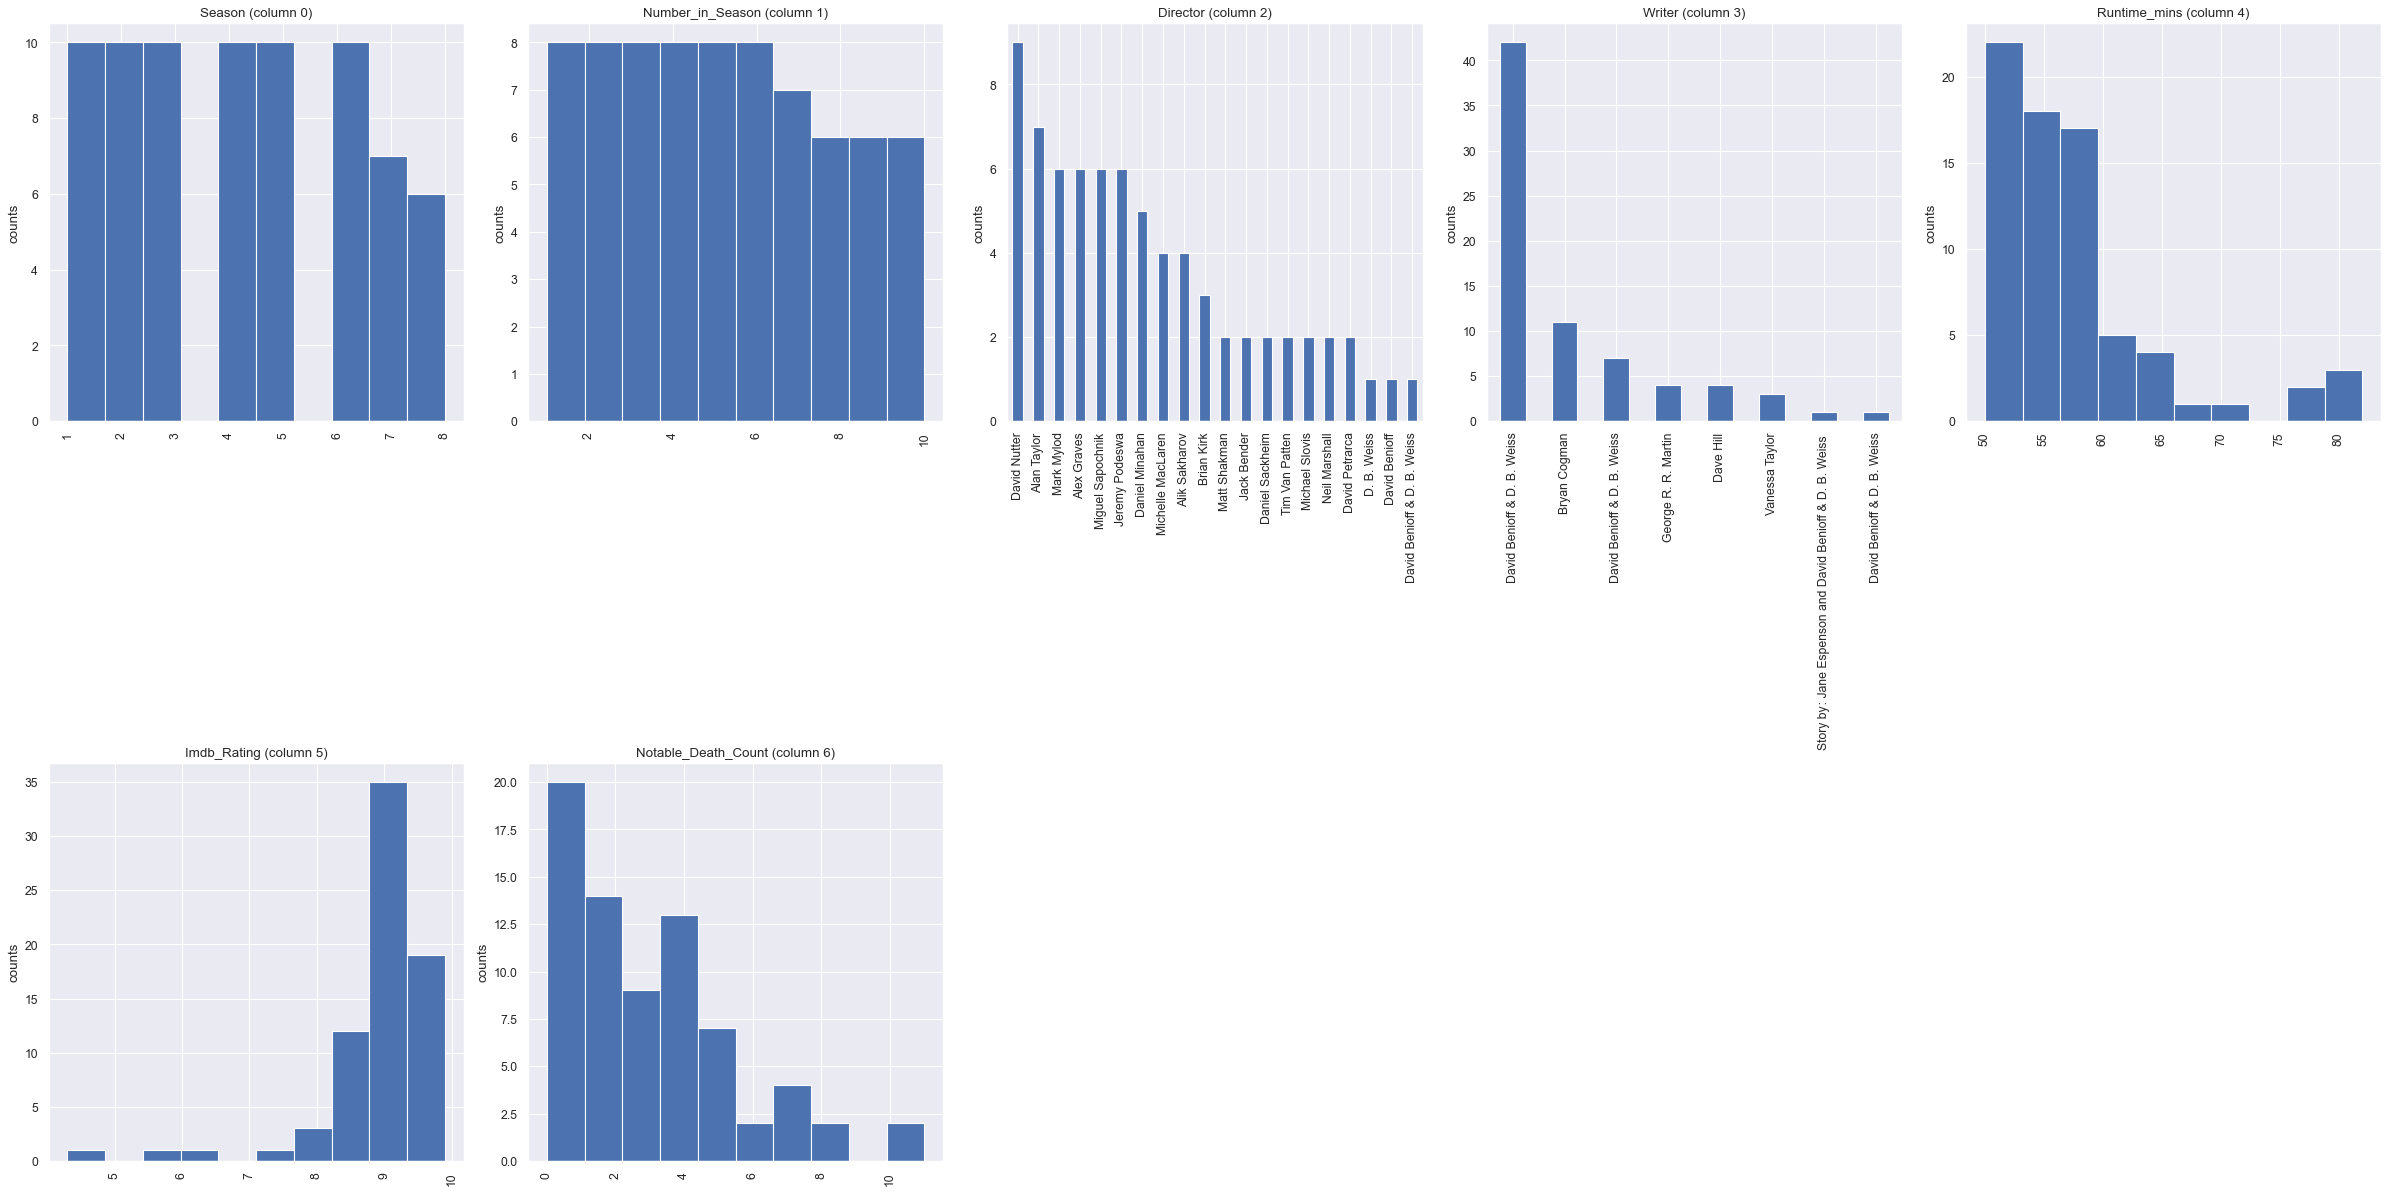

In [80]:
plotPerColumnDistribution(df_ep, 10, 5)

## Death Count Percentage

In [81]:
number_of_deaths_in_category = df_ep['Notable_Death_Count'].value_counts().sort_values(ascending=True)

data = [go.Pie(
        labels = number_of_deaths_in_category.index,
        values = number_of_deaths_in_category.values,
        hoverinfo = 'label+value'
    
)]

plotly.offline.iplot(data, filename='Notable_Death_Count')

> Most episodes have either 2 (19.2%, 14 episodes) or 4 o1 (17.8%, 13 episodes) notable deaths

## Average Rating of Episodes

Do any episodes perform really bad or really good?

In [82]:
data = [go.Histogram(
        x = df_ep.Imdb_Rating,
        xbins = {'start': 1, 'size':0.5, 'end' :10}
)]

print('Average episode rating = ', np.mean(df_ep['Imdb_Rating']))
plotly.offline.iplot(data, filename='overall_rating_distribution')

Average episode rating =  8.902739726027397


## Which Season is most Popular?

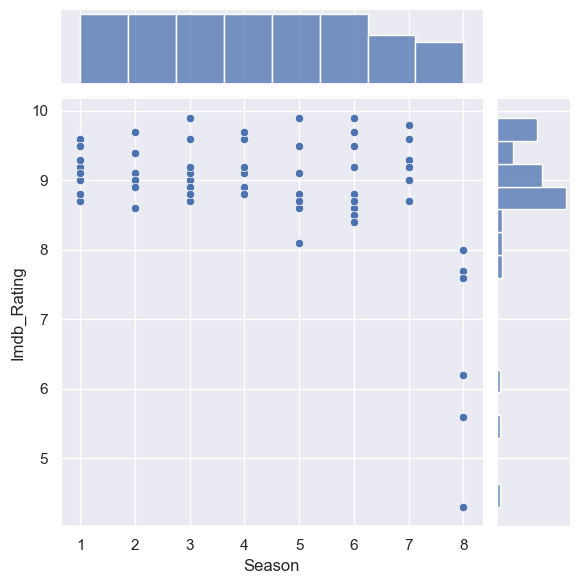

In [83]:
import seaborn as sns

sns.set_style("darkgrid")
ax = sns.jointplot(data=df_ep, x='Season', y='Imdb_Rating')


> Season 1 has most consistent ratings, Season 3 and 6 have highest ratings overall

## Notable Death - Impacts Ratings?

How do notable death count impact the episodes ratings

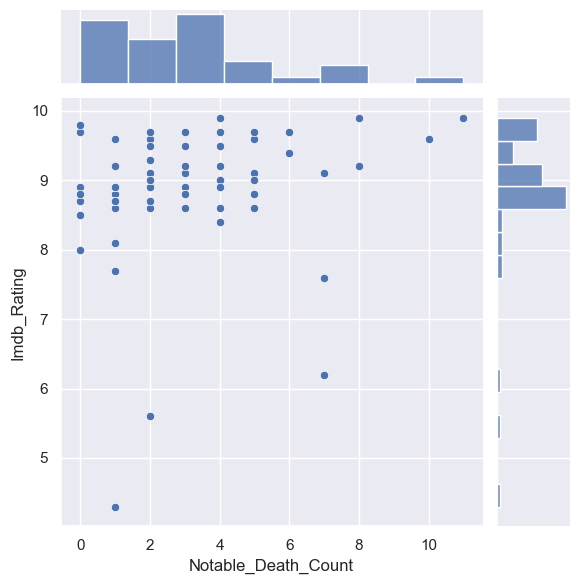

In [84]:
import seaborn as sns

sns.set_style("darkgrid")
ax = sns.jointplot(x=df_ep['Notable_Death_Count'], y=df_ep['Imdb_Rating'])


Most top rated episodes have optimally sized deaths 0 to 4 - neither too less nor too much.

 ## Is there are link between Ratings and Viewer figures?

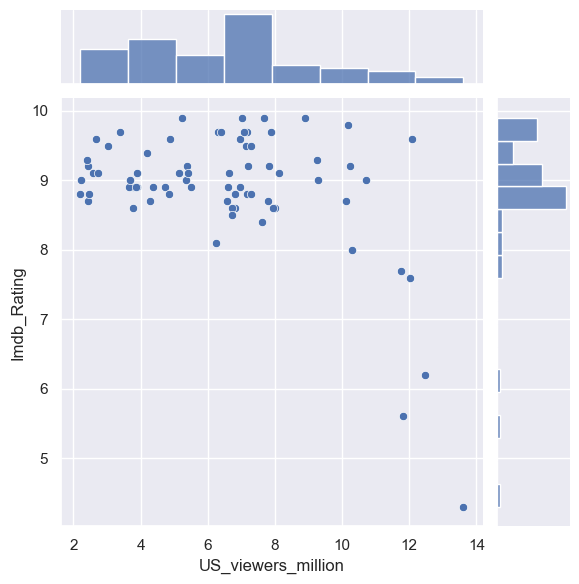

In [85]:
import seaborn as sns

sns.set_style("darkgrid")
ax = sns.jointplot(data=df_ep, x='US_viewers_million', y='Imdb_Rating')


> Consistent ratings until ~8 million viewers

## Another way to look at Same Analysis of Viewers vs. Ratings

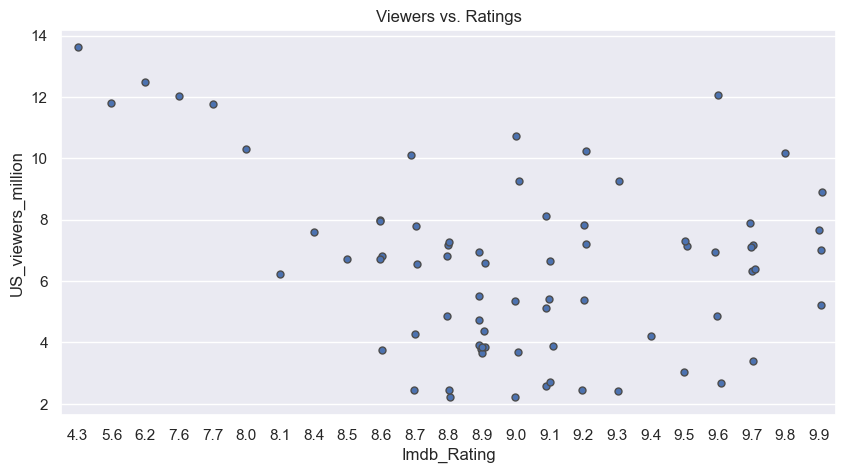

In [86]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
p = sns.stripplot(x="Imdb_Rating", y="US_viewers_million", data=df_ep, jitter=True, linewidth=1)
title = ax.set_title('Viewers vs. Ratings')

## Do certain Writers and Directors make better episodes?

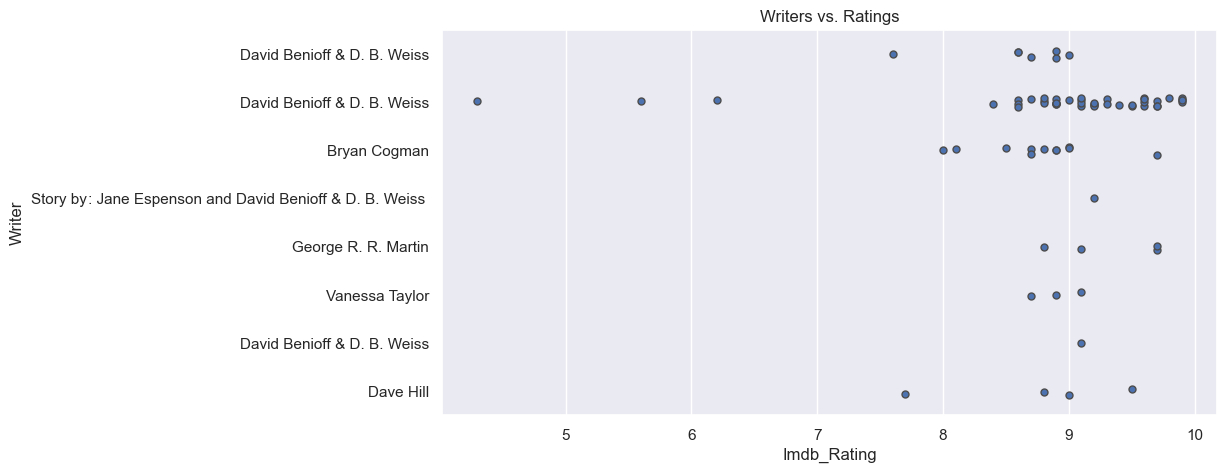

In [87]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
p = sns.stripplot(x="Imdb_Rating", y="Writer", data=df_ep_clean, jitter=True, linewidth=1)
title = ax.set_title('Writers vs. Ratings')

In [88]:
#df_ep_clean_1 = df_ep_clean
#df_ep_clean_1['Writer'] = df_ep_clean['Writer'].apply(lambda x: x.replace(' ', ' ') if ',' in str(x) else x)

## Do certain Directors make better Episodes?

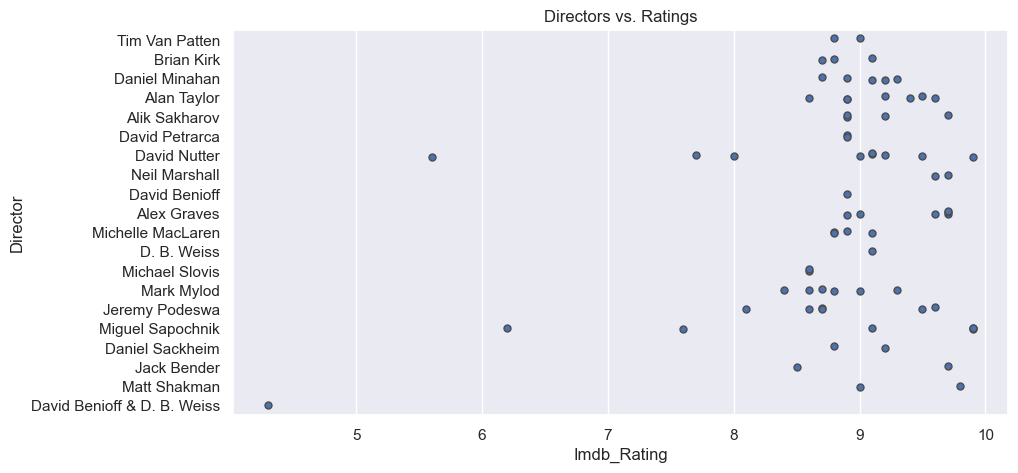

In [89]:

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
p = sns.stripplot(x="Imdb_Rating", y="Director", data=df_ep_clean, jitter=True, linewidth=1)
title = ax.set_title('Directors vs. Ratings')

## Viewers and Ratings by Writers and IMDB Voters

In [90]:
#!pip install bubbly

In [91]:
from __future__ import division
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode()

# Install bubbly if not already installed
try:
    from bubbly.bubbly import bubbleplot
except ModuleNotFoundError:
    !pip install bubbly
    from bubbly.bubbly import bubbleplot


In [41]:
figure = bubbleplot(dataset=df_ep_clean, x_column='US_viewers_million', y_column='Imdb_Rating'
                   ,     bubble_column='Season' 
                  #,  time_column='Original_Air_Date'
                    , size_column='IMDB_votes'
                    , color_column='Writer'
    ,x_title="Viewers (millions)", y_title="IMDB Ratings", title='Viewers and Ratings by Writers and IMDB Voters',
    x_logscale=True, scale_bubble=3, height=650)

iplot(figure, config={'scrollzoom': True})

## Conclusion
This concludes my inital analysis! 